# Auxiliary

In [156]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from utils import *

In [157]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Models

In [158]:
from models.pbc import Box
from models.lj import LJFluid
from models.chain import GaussianChain
from models.ising import IsingModel
from models.nematic import NematicLattice

## LJ Fluid

In [282]:
lj = LJFluid(dim = 3)
x = lj.init_coords(20, init_try = 5000)

In [283]:
lj.calc_energy(x)

-6.7089549952927845

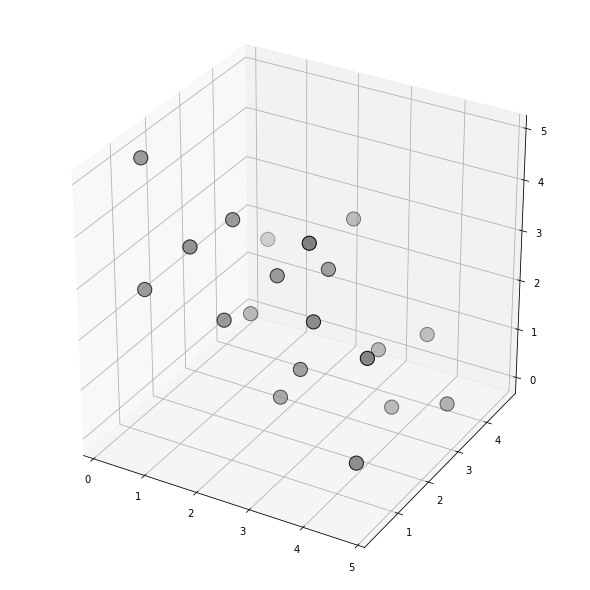

In [284]:
lj.draw_config(x)

## Gaussian Chain

In [291]:
chain = GaussianChain(r0 = 1.5, k = 10.0, L = 10)

chain.params

{'sig': 1.0, 'eps': 1.0, 'r0': 1.5, 'k': 10.0, 'L': 10}

In [292]:
N = 400
x = chain.init_coords(N)

chain.calc_energy(x)

chain.calc_energy_idx(x, 1)

-5.183961238656961

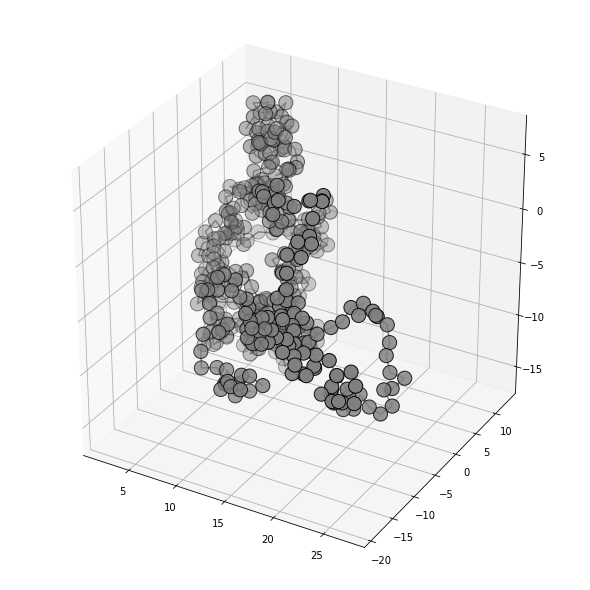

In [293]:
chain.draw_config(chain._unwrap(x))

In [294]:
%time chain.oprm(x)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.27 ms


137.53597229588357

## Ising Model

In [295]:
ising = IsingModel(h = 1.0)

ising.params

{'h': 1.0, 'J': 1.0}

In [297]:
x = ising.init_coords(25)

ising.energy(x)

4.0

In [299]:
%time ising.energy_idx(x, 25)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 78 µs


-1.0

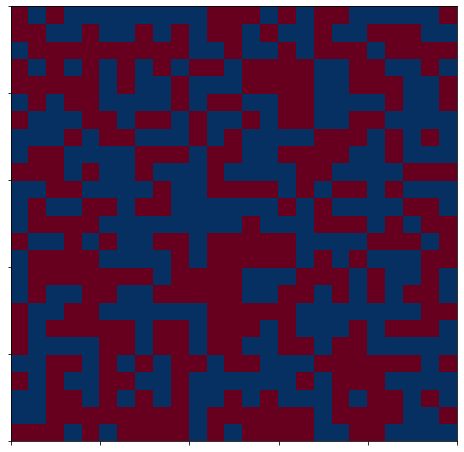

In [300]:
ising.draw_config(x)

In [301]:
ising.oprm(x)

0.0144

## Nematic Lattice 

In [302]:
nem = NematicLattice()

In [303]:
x = nem.init_coords(10)

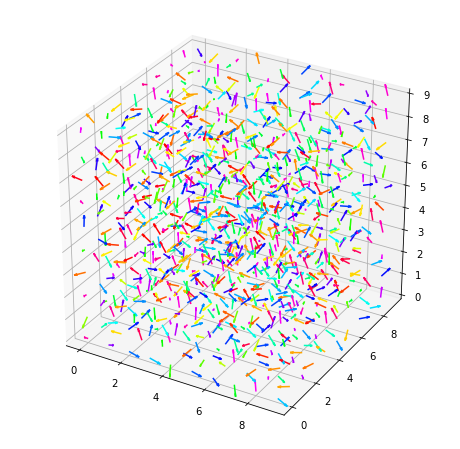

In [304]:
nem.draw_config(x)

In [306]:
nem.energy_idx(x, 240)

-0.4185400559324106

# MCMC

In [310]:
from mcmc.metropolis import MetropolisMCMC

## Metropolis

In [311]:
from models.pbc import Box
from models.lj import LJFluid
from models.chain import GaussianChain
from models.ising import IsingModel
from models.nematic import NematicLattice

In [312]:
model = NematicLattice()

x0 = model.init_coords(5)

In [321]:
np.random.randint(np.prod(x.shape[:-1]))

71